In [2]:
import pandas as pd 
import numpy as np

# **Importing DataSet**

In [17]:
# importing an online dataset into a pandas dataframe
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",header=None)

# giving its columns proper header names
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# **Data Cleaning**





**First Step: Dropping all missing values**

In [18]:
df.replace('?',np.nan,inplace=True)

# now drpping all the rows where price column has NaN value
df.dropna(subset=['price'],axis=0,inplace=True)

**Second Step: Filling missing values by following methods**

*   Mean of the column ( incase column has a variety of different values )
*   Highest frequency ( if frequency of one value of the column dominates then that value is assigned to the missing values )





1.   **Mean of column**




In [20]:
# converting columns from type object/string to float so that their mean can be taken

# FOR COLUMN 'NORMALIZED-LOSSES'

df['normalized-losses']=df['normalized-losses'].astype('float')

df["normalized-losses"].replace(np.nan, df['normalized-losses'].mean(), inplace=True)


# FOR COLUMN 'BORE'


df["bore"].replace(np.nan, df['bore'].mean(), inplace=True)


# FOR COLUMN 'STROKE' 

df['stroke'].replace(np.nan,df['stroke'].mean(),inplace=True)


# FOR COLUMN 'HORSEPOWER'

df['horsepower'].replace(np.nan,df['horsepower'].mean(),inplace=True)


# FOR COLUMN 'PEAK-RPM'
df['peak-rpm'].replace(np.nan,df['peak-rpm'].mean(),inplace=True)



2.   **Highest Frequency**



In [22]:
df['num-of-doors'].value_counts() # will give the value counts for each value
df['num-of-doors'].value_counts().idxmax() # will directly give the maximum occcuring value

df['num-of-doors'].replace(np.nan,df['num-of-doors'].value_counts().idxmax(),inplace=True)

**Third Step: Converting Data Types to Proper Format**

In [21]:
df['normalized-losses']=df['normalized-losses'].astype('float')

df['bore']=df['bore'].astype('float')

df['stroke']=df['stroke'].astype('float')

df['horsepower']=df['horsepower'].astype("float")

df['peak-rpm']=df['peak-rpm'].astype("float")

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

**Fourth Step: Normalizing The Data**

In [23]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

**Fifth Step: Data Binning**

In [24]:
# In binning we divide all the data into categories so they are easier to differentiate

categories=['Low','Medium','High']

bins=np.linspace(min(df['price']),max(df['price']),4) # will section the price values into equally spaced intervals to categorize them
df['price-binned']=pd.cut(df['price'],bins,labels=categories,include_lowest=True)

print(df['price-binned'])

bins=np.linspace(min(df['horsepower']),max(df['horsepower']),4)
df['horsepower-binned']=pd.cut(df['horsepower'],bins,labels=categories,include_lowest=True)

print(df['horsepower-binned'])

df.reset_index(drop=True,inplace=True) # re-initialize all the indexes from 0 to N

df

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
200       Low
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 201, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
0         Low
1         Low
2      Medium
3         Low
4         Low
        ...  
200       Low
201    Medium
202    Medium
203       Low
204       Low
Name: horsepower-binned, Length: 201, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-binned,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,Low,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,Low,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,Low,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,Low,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,Low,Low
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,0.928094,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,Medium,Medium
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,Medium,Medium
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,Medium,Low


**Sixth Step: One Hot Encoding (Dummy Variables)**

In [25]:
# we can see that fuel type and aspiration column only has 2 values so we can create dummy columns for the by converting them into integers

dummy_fuel_type=pd.get_dummies(df['fuel-type'])
df['fuel-diesel']=dummy_fuel_type['diesel']
df['fuel-gas']=dummy_fuel_type['gas']

df.drop("fuel-type", axis = 1, inplace=True)

aspiration_dummy=pd.get_dummies(df['aspiration'])
df['aspiration-std']=aspiration_dummy['std']
df['aspiration-turbo']=aspiration_dummy['turbo']

df.drop("aspiration", axis = 1, inplace=True)

# **Exploratory Data Analysis**

**In This Segment We Will Find Out What Attributes Affect The Price Of The Car By Visualizing**

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

Finding Correlation of columns with one another

In [27]:
df.corr()
df[['horsepower','price']].corr()

,horsepower,price
horsepower,1.000000,0.809681
price,0.809681,1.000000


**Finding Linear Relationship Between Other Atrributes With Price Through Regression**



**1.**   **Engine Size and Price**



,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


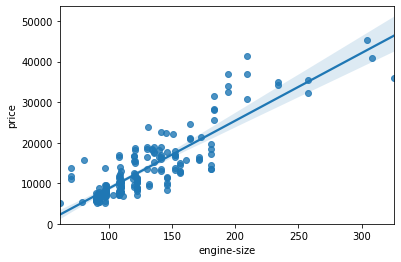

In [28]:
# Engine size as potential predictor variable of price, Engine size seems like a pretty good predictor of price since 
# the regression line is almost a perfect diagonal line.
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

# we can also find out the correlation value
df[['engine-size','price']].corr()


**2.**   **Highway-L/100km vs Price**



,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


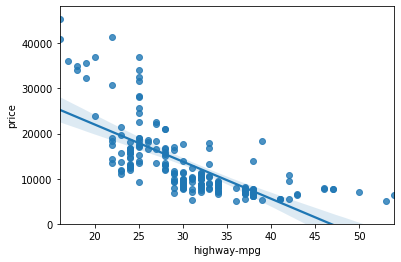

In [29]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

# we can also find out the correlation value
df[['highway-mpg','price']].corr()


**3.** **Peak-rpm vs Price** 



,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


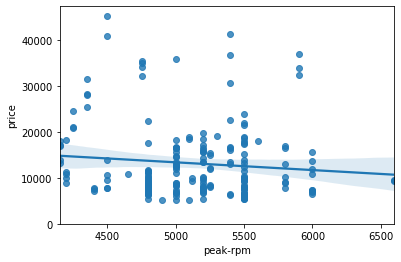

In [30]:
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

# we can also find out the correlation value
df[['peak-rpm','price']].corr()

**Finding Relationship Between Categorical Variables With Price Using Boxplots**



**1.**   **Body-Style vs Price**



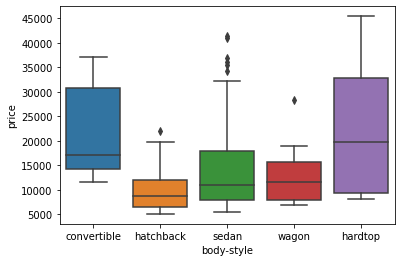

In [31]:
# We see that the distributions of price between the different body-style categories have a significant overlap, 
# and so body-style would not be a good predictor of price. 
sns.boxplot(x="body-style", y="price", data=df)


**2.**   **Engine-Location vs Price**



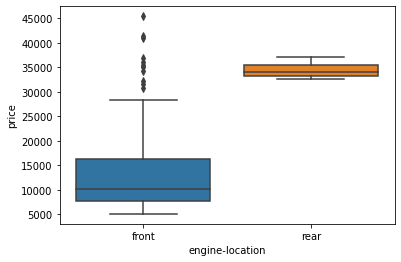

In [32]:
# Here we see that the distribution of price between these two engine-location categories, front and rear,
# are distinct enough to take engine-location as a potential good predictor of price.
sns.boxplot(x="engine-location", y="price", data=df)



**3.** **Drive-wheels vs Price** 



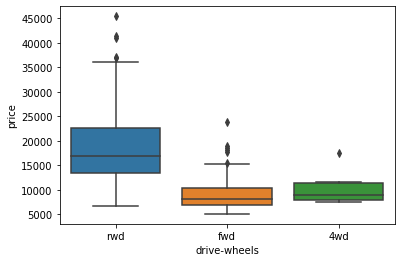

In [33]:
# Here we see that the distribution of price between the different drive-wheels categories differs;
# as such drive-wheels could potentially be a predictor of price.
sns.boxplot(x='drive-wheels',y='price',data=df)

# **Descriptive Statistical Analysis**

It is used to see the spread of data and to check whether the data is normally distributed or not and whether the given data is skewed or not.

In [34]:
df.describe()

df.describe(include=['object']).transpose() # will give description about string columns

,count,unique,top,freq
make,201,22,toyota,32
num-of-doors,201,2,four,115
body-style,201,5,sedan,94
drive-wheels,201,3,fwd,118
engine-location,201,2,front,198
engine-type,201,6,ohc,145
num-of-cylinders,201,7,four,157
fuel-system,201,8,mpfi,92


From Above We Deduced That Engine Location And Drive Wheels Could Be Potential Predictors Of Price So Using Descriptive Statistics To Find Out If They Will Be Used As Predictors Or Not

**Using Value Counts For:**



**1.** **Drive Wheels**



In [35]:
# we can see that it can be used as a potential predictor for price 
drive_wheel_counts=df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
drive_wheel_counts.index.name='drive-wheels'
drive_wheel_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8




**2.   Engine Location**



In [36]:
# we can see that the data is skewed and there aren't many values of rear to make a judgement on price so we cannot consier this as a predictor of price
engine_location_counts=df['engine-location'].value_counts().to_frame()
engine_location_counts.rename(columns={'engine-location':'value_counts'},inplace=True)
engine_location_counts.index.name='engine-location'
engine_location_counts

,value_counts
engine-location,
front,198
rear,3


# **Grouping**

**Now That We Are Left With Drive-wheels, We Can Find The Average Price Of Each Drive Wheel**

In [37]:
# we can see that on average, rear wheel drives are the most expensive
grouped_drive_wheels=df[['drive-wheels','price']]
grouped_drive_wheels=grouped_drive_wheels.groupby(['drive-wheels'],as_index=False).mean()
grouped_drive_wheels

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [38]:
# we can also group with multiple variables such as
multiple_group_drive_wheels=df[['drive-wheels','body-style','price']]
multiple_group_drive_wheels=multiple_group_drive_wheels.groupby(['drive-wheels','body-style'],as_index=False).mean()
print(multiple_group_drive_wheels.transpose())

# using pivot to convert this into a more readable format
pivot_multiple_group_drive_wheels=multiple_group_drive_wheels.pivot(index='drive-wheels',columns='body-style')
pivot_multiple_group_drive_wheels.fillna(0,inplace=True)
pivot_multiple_group_drive_wheels

                     0        1        2   ...         10       11       12
drive-wheels        4wd      4wd      4wd  ...        rwd      rwd      rwd
body-style    hatchback    sedan    wagon  ...  hatchback    sedan    wagon
price              7603  12647.3  9095.75  ...    14337.8  21711.8  16994.2

[3 rows x 13 columns]


price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

# **Correlation And Causation**

We have to understand that correlation doesn't imply causation. To check the significance of the correlation we use the p-value which the Pearson method provides

**1. Pearson Method ( for numeric variables )**

If p_value:
* <0.001, strong certainty in the result
* <0.05, moderate certainty in the result
* <0.1, weak certianty
* greater than 0.1, no certainty




If correlation coeffecient:
* close to +1 then strong +ve relationship
* close to -1 then strong -ve relationship
* close to 0, no relationship

In [39]:
from scipy import stats



*  **Wheel-Base vs Price**



In [40]:
# Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant,
# although the linear relationship isn't extremely strong (~0.585)
coeff, p_value=stats.pearsonr(df['wheel-base'],df['price'])
coeff,p_value

(0.584641822265508, 8.076488270733218e-20)


* **Horsepower vs Price**



In [41]:
# Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant,
# and the linear relationship is quite strong (~0.809, close to 1)
coeff, p_value=stats.pearsonr(df['horsepower'],df['price'])
coeff,p_value

(0.8096811975632288, 6.058444649710002e-48)



*   **Length vs Price**



In [42]:
# Since the p-value is  <  0.001, the correlation between length and price is statistically significant,
# and the linear relationship is moderately strong (~0.691).
coeff, p_value=stats.pearsonr(df['length'],df['price'])
coeff,p_value

(0.6906283804483639, 8.016477466159328e-30)

We do the same thing with the rest of the attributes (width, curb-weight, engine-size, bore, city-L/100km, Highway-L/100km ) and find out that they are all statistically significant

**2. ANOVA Method ( for groups or categorical variables )**

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.



*   **Drive-Wheels vs Price**



In [43]:
test_drive_wheels=df[['drive-wheels','price']]
test_drive_wheels=test_drive_wheels.groupby(['drive-wheels'])

# using ANOVA method to get each group
f_val,p_val= stats.f_oneway(test_drive_wheels.get_group('fwd')['price'],test_drive_wheels.get_group('4wd')['price'],test_drive_wheels.get_group('rwd')['price'])
f_val,p_val

(67.95406500780398, 3.3945443577151245e-23)

This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

**FWD vs RWD**

In [44]:
# checking separately for fwd and rwd
f_val, p_val = stats.f_oneway(test_drive_wheels.get_group('fwd')['price'], test_drive_wheels.get_group('rwd')['price'])  
f_val,p_val

(130.5533160959111, 2.2355306355677845e-23)

**RWD vs 4WD**

In [45]:
# checking separately for 4wd and rwd
f_val, p_val = stats.f_oneway(test_drive_wheels.get_group('4wd')['price'], test_drive_wheels.get_group('rwd')['price'])  
f_val,p_val

(8.580681368924756, 0.004411492211225333)

**4WD and FWD**

In [46]:
# checking separately for fwd and 4wd
f_val, p_val = stats.f_oneway(test_drive_wheels.get_group('fwd')['price'], test_drive_wheels.get_group('4wd')['price'])  
f_val,p_val

(0.6654657502523033, 0.41620116697845666)

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

1. Length
2. Width
3. Curb-weight
4. Engine-size
5. Horsepower
6. City-mpg
7. Highway-mpg
8. Wheel-base
9. Bore

Categorical variables:
1. Drive-wheels

# **Model Development**



Process of using independent variables (columns/attributes) to predict dependant variables (output)


# **Linear Regression**

**1. Single Linear Regression**

Relies on 1 independent(predictor) variable to make a prediction



In [47]:
#Suppose we only want highway-mpg to predict the price of the car then we can define and fit the model as follows

from sklearn.linear_model import LinearRegression 

lm=LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
				
lm.fit(X,Y)

Output_single_LR=lm.predict(X)

# we can also find the slope as well as intercept (basic equation ==> y(output)= coeff*highway-mpg + intercept) or y=mx+c

print(lm.intercept_,lm.coef_)

38423.3058581574 [-821.73337832]


**2. Multiple Linear Regression**

Relies on multiple independent(predictors) variables to make a prediction

In [48]:
#Suppose we want mutiple attributes to predict the price of the car then we can define and fit the model as follows

X=df[['horsepower','curb-weight','highway-mpg','engine-size']]
Y=df['price']

lm.fit(X,Y)

Output=lm.predict(X)

# we can also find the slope as well as intercept 

#(basic equation ==> y(output)= coeff1*horsepower + coeff2*curb-weight + coeff3*highway-mpg + coeff4*engine-size + intercept)

print(lm.intercept_,lm.coef_)

-15824.038208234473 [53.61042729  4.70886444 36.39637823 81.47225667]


# **Model Evaluation and Visualization**

**1. Regression Plot** (Single Linear Regression)



When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize highway-mpg as potential predictor variable of price:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


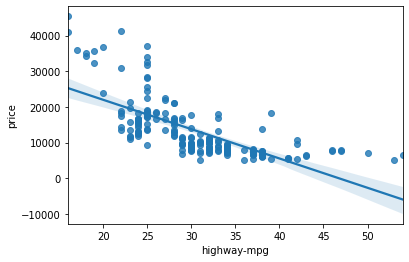

In [49]:
sns.regplot('highway-mpg','price',data=df)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


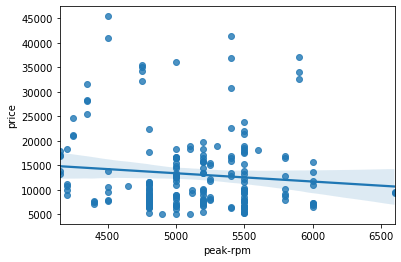

In [50]:
sns.regplot('peak-rpm','price',data=df)


Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

**2. Residual Plot** (Single Linear Regression)

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

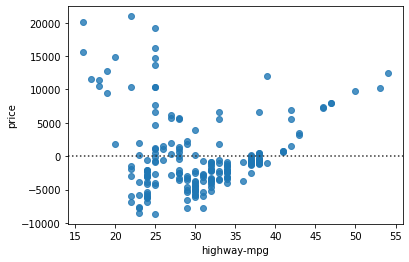

In [51]:
# we expect the data points to be evenly spread across x-axis from both sides, a curve suggests that linear assumption is incorrect
sns.residplot(x=df['highway-mpg'],y=df['price'])

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

**3. Distribution Plot** (Multiple Linear Regression)


Calculates the predicted value vs the actual value

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


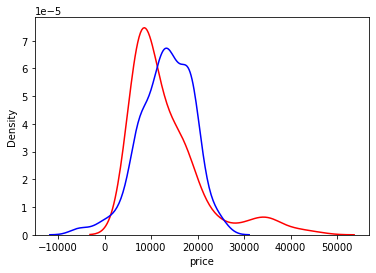

In [52]:
# to know the actual distribution of price
actual_price_dist=sns.distplot(df['price'],hist=False,color="r",label="Actual Value")
actual_price_dist

sns.distplot(Output_single_LR,hist=False,color="b",label="Predicted Values",ax=actual_price_dist)

# **Polynomial Regression and Pipelines**



We use this when a linear model is not the best fit for our data.


We transform our data into a polynomial, then use linear regression to fit the model, we saw that highway-mpg was non-linear so we are going to have to use polynomial regression to find out the formula for it.

**1. Polynomial Regression**

A special case of the general linear regression model and involves curves (curvilinear relationship)

A curvilinear relationship involves squaring or setting higher order terms of the predictor variables.

**a. Second order polynomial regression**

*   The value of predictor variable in the second coeff is squared e.g

    Y = b0 + b1x1 + b2(x2)^2 



**b. Third order polynomial regression**

*   The value of predictor variable in the third coeff is squared e.g

    Y = b0 + b1x1 + b2(x2)^2 + b3(x3)^3 



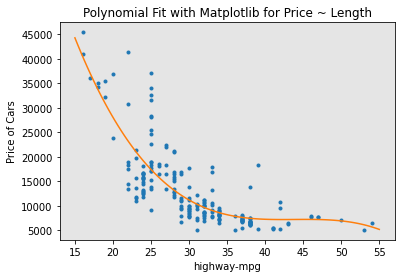

In [53]:
f=np.polyfit(df['highway-mpg'],df['price'],3) # 3 is for the degree of the polynomial which in this cases is 3
p=np.poly1d(f)

# function to plot a polynomial
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

PlotPolly(p,df['highway-mpg'],df['price'],'highway-mpg')

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

**2. Multivariable Polynomial Regression**

In [54]:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=2)

**3. Pipelines**

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# list of tuples needs to be created for pipeline input
pipeInput=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('mode',LinearRegression())]
pipe=Pipeline(pipeInput)

# training the pipeline object
pipe.fit(df[['horsepower','curb-weight','engine-size','highway-mpg']],df['price'])

predicted_price_values=pipe.predict(df[['horsepower','curb-weight','engine-size','highway-mpg']])

#for i in range(len(df)):
#  print(predicted_price_values[i],df.loc[i]['price'])

predicted_price_values

array([13103.37745014, 13103.37745014, 18228.50045451, 10392.95563313,
       16133.76874429, 13878.99841604, 15040.52398958, 15457.18229978,
       17971.74460633, 10512.50604851, 10512.50604851, 15846.59047029,
       16068.9328601 , 18546.45027861, 25223.19860038, 25177.05656094,
       26516.74692087,  5900.24166664,  6229.03170433,  6268.69165797,
        5977.6126814 ,  5832.68665537, 10112.70695196,  6061.09950298,
        6118.21744542,  6118.21744542, 10046.3789839 , 11299.33227733,
       18336.78086591,  7340.16414969,  6422.97757555,  5174.90635362,
        6619.95418045,  6652.6795456 ,  6766.01245592,  6796.12160527,
        8797.23633484,  8948.8815695 ,  8992.57847103,  9194.97845318,
       10929.44427235, 10055.80435075,  9656.98115358, 12123.53519496,
       36318.85330144, 36318.85330144, 41644.67639633,  5909.79502176,
        5927.95683261,  5940.92109016,  6046.00886629,  6059.31655277,
       10195.46836109, 10195.46836109, 10183.88732743, 15942.42052332,
      

# **Measures for In-sample Evaluation**


When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

* R^2 / R-squared
* Mean Squared Error (MSE)

>R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

>Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

**1. Mean Squared Error (MSE)**

In this we take the difference between the actual value and the predicted value then square it. 

This is done for every value and all these are added altogether then divided by the number of samples or total number of values

In [56]:
from sklearn.metrics import mean_squared_error

# for single linear regression
lm.fit(df[['highway-mpg',]],df['price'])
predicted_price_values=lm.predict(df[['highway-mpg']])
print(mean_squared_error(df['price'],predicted_price_values))

# for multiple linear regression 
Z=df[['curb-weight','engine-size','horsepower','highway-mpg']]
lm.fit(Z,df['price'])
Y=lm.predict(Z)
print(mean_squared_error(df['price'],Y))

# for polynomial linear regression
mean_squared_error(df['price'], p(df['highway-mpg']))


31635042.944639888
11976801.681229591


20474146.426361226

**2. R-Squared/R^2**

Also called coefficient of determination and used to determine how close the data is to the fitted line


In [57]:
# value will lie between 0(worst case) and 1(best case), incase value is negative, that could be due to overfitting

# for single linear regression
lm.fit(df[['highway-mpg']],df['price'])
print(lm.score(df[['highway-mpg']],df['price']))

# for multiple linear regression
lm.fit(Z,df['price'])
print(lm.score(Z,df['price']))

# for polynomial linear regression
from sklearn.metrics import r2_score
r_squared = r2_score(df['price'], p(df['highway-mpg']))
print(r_squared)

0.4965911884339176
0.8094130135602673
0.6741946663906517


# **Prediction and Decision Making**



Process of determining whether our model is the best fit or not. This can be done by:

1. Do the predicted values make sense?
2. Visualization
3. Numerical measures for evaluation
4. Comparing models

**Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)**

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

**Simple Linear Model (SLR) vs Polynomial Fit**


MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

**Multiple Linear Regression (MLR) vs Polynomial Fit**


MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

**Conclusion:**
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.


# **Model Evaluation and Refinement**

In sample evaluation tells us how our model will fit the data used to train it but it does not tell us how well the trained model can be used to predict the data.

**Solution?**
* **Splitting The Data**

We split our data into 2 sets, training set (in sample data) and test set (out of sample data)

if you use data 1990-2013 to fit the model and then you forecast for 2011-2013, it's in-sample forecast. but if you only use 1990-2010 for fitting the model and then you forecast 2011-2013, then its out-of-sample forecast.


Larger portion of the data is used to train the model and rest is for test set

In [58]:
from sklearn.model_selection import train_test_split

# here function recieves 4 args, first is the variables that we are using to predict the data, second is the value that we want to predict,
# third is the split percentage of test data so here training data will be 70% of the data and rest will be used for testing, lastly random_state
# is used for random splitting of data

y_data=df['price']
x_data=df.drop('price',axis=1)

# we divide the data into 90% training set and 10% test set
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.10,random_state=1)

#print("number of test samples :", x_test.shape[0])
#print("number of training samples:",x_train.shape[0])

Now we will fit the model using linear regression

In [59]:
lr=LinearRegression()

lr.fit(x_train[['horsepower']],y_train)

# now lets calculate R-squared for test data(can also use MSE)
score1=lr.score(x_test[['horsepower']],y_test)
score1 # we can see that the r-square is low using the test data

# now lets calculate R-squared for training data(can also use MSE)
score2=lr.score(x_train[['horsepower']],y_train)
score2 # we can see that the r-square is comparitively higher using the train data

0.6621588065210515

* **Generalization Error**

>It is a measure of how well our model performs when it comes to predicting 
previously unseen data. This means our model could perform great on the 90% (assumption) of the training data but when it comes to the test data, (the data that our model hasn't seen before) it does not perform too well and will be precise but less accurate. 

>On the other hand if we use fewer data points to train the model and more to test the model then our accuracy will be less but precision will be high

>We saw that R-squared was low on test data but high on train data. We also were using out of sample evaluation. This is where cross validation comes in because it will perform in sample evaluation by dividing the data into folds.

**Cross Validation**

In cross validation, we divide the whole data set into K number of groups, say 3 groups. One by one, 2 of the groups will be used for training and the last for testing, this process will repeat for K number of times as this way each group will be used for training as well as testing and this will return an array of K scores which we can then take an average of to find the average score.



>**1. Cross validation score**

It will return an array of K scores which will determine the performance of the different groups of data.

In [60]:
from sklearn.model_selection import cross_val_score

# here suppose we are using linear regression, the cv=3 means that data is divided into 3 groups, default scoring is r-sqaured
scores=cross_val_score(lr,x_data[['horsepower']],y_data,cv=4)
#average_score=np.mean(scores)
scores

#We can calculate the average and standard deviation of our estimate
print("The mean of the folds are", scores.mean(), "and the standard deviation is" , scores.std())

The mean of the folds are 0.5221732664777984 and the standard deviation is 0.29158341973020163


**2. Cross validation prediction**

This will return the array of the predicted values for each group instead of scores of each group.

In [61]:
from sklearn.model_selection import cross_val_predict

# this will return an array of size 3 each element containg an array of predictions for a group
predicted_values=cross_val_predict(lr,x_data[['horsepower']],y_data,cv=4)
predicted_values

array([14143.6442164 , 14143.6442164 , 20817.63619486, 12746.7621744 ,
       14764.48067952, 13988.43510063, 13988.43510063, 13988.43510063,
       18644.70857397, 12591.55305862, 12591.55305862, 15695.73537418,
       15695.73537418, 15695.73537418, 25163.49143664, 25163.49143664,
       25163.49143664,  4365.46992239,  7780.07046951,  7780.07046951,
        7469.65223795,  7469.65223795, 12746.7621744 ,  7469.65223795,
        7469.65223795,  7469.65223795, 12746.7621744 , 10573.83455351,
       19420.75415286,  5917.56108017,  8711.32516417,  6227.97931173,
        8711.32516417,  8711.32516417,  8711.32516417,  8711.32516417,
       10263.41632195, 10263.41632195, 10263.41632195, 10263.41632195,
       12591.55305862, 12436.34394285,  9021.74339573, 10884.25278507,
       24232.23674197, 24232.23674197, 37580.22069888,  7469.65223795,
        7469.65223795,  7469.65223795,  7469.65223795,  7192.64508882,
       12627.03163429, 12627.03163429, 12627.03163429, 18226.09655992,
      

# **Overfitting, Underfitting, Model Selection**

**Model Selection** 

We will decide how to choose the correct polynomial order and problems that arrive when selecting the wrong order.

**Overfitting:**

When we over train our data and the model fits the noise rather than the function.


It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world. One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

Let's create Multiple linear regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [62]:
lr=LinearRegression()

# prediction using training data
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)
yhat_train=lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train

# prediction using test data
yhat_test=lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test

array([11350.45521266,  5884.59029431, 11207.42589659,  6640.92536133,
       15566.43146855,  6028.00695806, 18960.07057256, 11088.19662175,
       15600.1814176 ,  5724.40056613, 11346.06899279,  6582.96262769,
       15520.88932069, 17998.41254063, 12280.30851581, 14321.39602302,
        4820.98457242, 17618.51437556,  6533.81354758,  9373.33360027,
        9872.14649298])

In [63]:
# function to plot a distribution plot
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

# function to plot a polynomial graph
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

Let's perform some model evaluation using our training and testing data separately. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


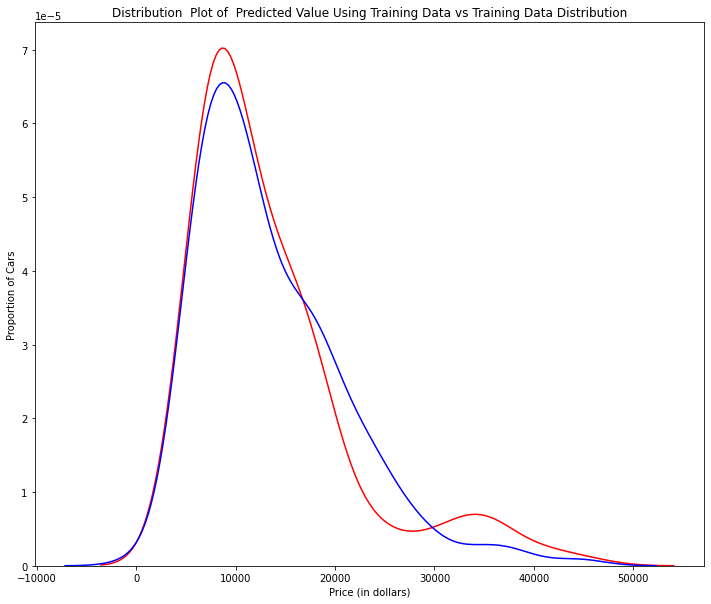

In [64]:
# firstly seeing the training data predictions vs the actual training price
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


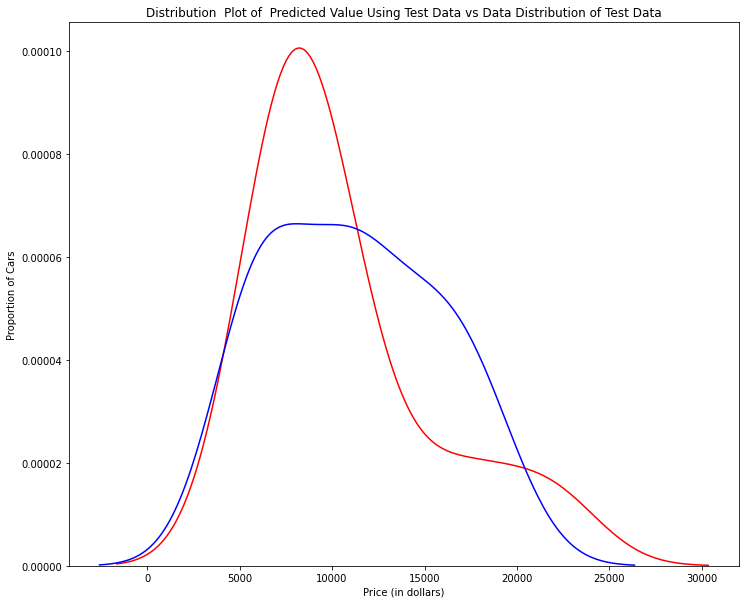

In [65]:
# secondly seeing the test data predictions vs the actual test price
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

Let's use 55 percent of the data for training and the rest for testing:

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature 'horse power'.

In [67]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

Now let's create a linear regression model "poly" and train it.

Predicted values: [ 6724.76828468  7303.51314872 12213.8613518  18899.15291183]
True values: [ 6295. 10698. 13860. 13499.]


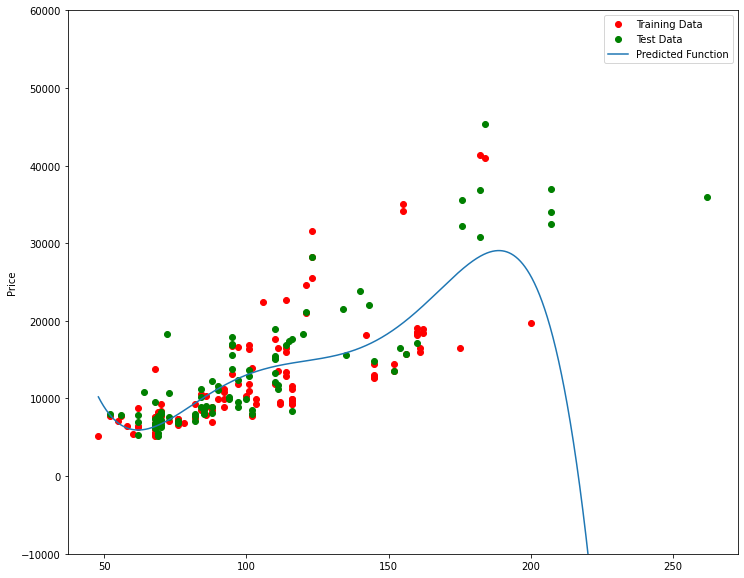

In [68]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr) # to see the outputs
yhat

#Let's take the first five predicted values and compare it to the actual targets.
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

# checking through polynomial function
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [69]:
# R^2 of the training data:
poly.score(x_train_pr, y_train)

# R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.69540435894235

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

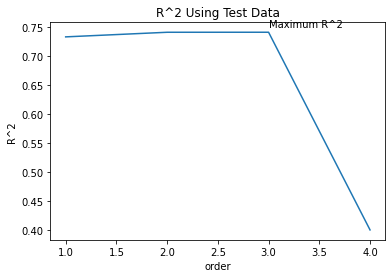

In [70]:
# choosing the best polynomial order,we can use mean square error as well
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically decreases at four.

In [71]:
# this allows you to choose freely the best order and interact 

from ipywidgets import interact, interactive, fixed, interact_manual
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f>

Now using multiple feautues to predict values:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


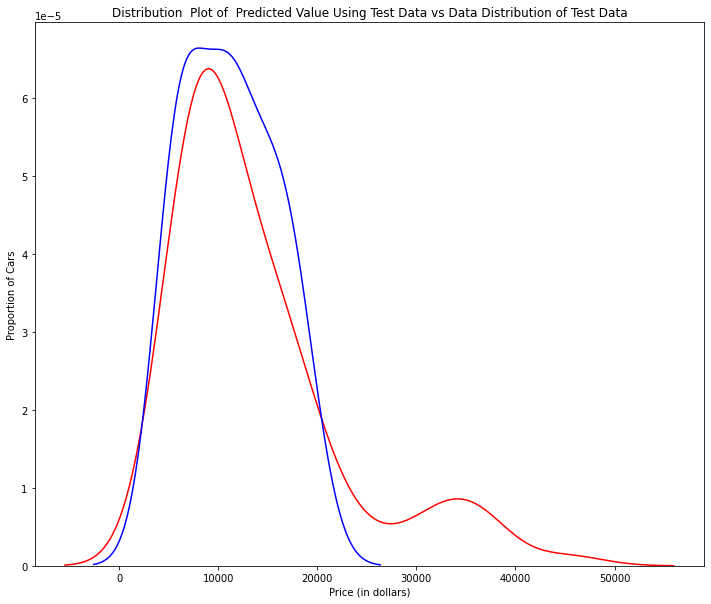

In [72]:
pr1=PolynomialFeatures(degree=2)

x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
x_train_pr1.shape # will tell us the amount of variables used in the polynomial

poly1=LinearRegression()
poly1.fit(x_train_pr1,y_train)

yhat=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Text(3, 0.75, 'Maximum R^2 ')

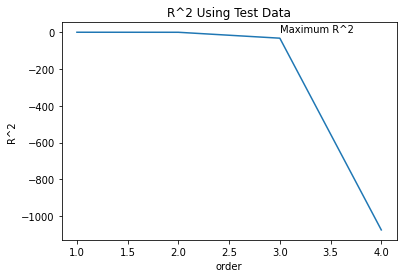

In [73]:
# choosing the best polynomial order,we can use mean square error as well
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    


**Underfitting:**

Where our model is too simple to fit the data

# **Ridge Regression** (prevents overfitting)


Ridge regression is a regression that is employed in a Multiple regression model when Multicollinearity occurs. Multicollinearity is when there is a strong relationship among the independent variables. Ridge regression is very common with polynomial regression.  

In many cases, real data has outliers (data points that are scattered far away from all the other data points), so if we use any order polynomial, say 10th, the function will not fully fit the data because of the outlier. The magnitude of the coefficients of the polynomials are extremely large so to control the magnitude of the coefficients, we use the parameter 'alpha' from ridge regression.

When alpha is zero, overfitting will occur (incase of outliers in data) and when alpha is large then underfitting will occur because the coefficients will become close to zero as increasing alpha reduces the magnitude of the coefficients.


In this section, we will review Ridge Regression we will see how the parameter Alfa changes the model. Just a note here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data.

In [74]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

from sklearn.linear_model import Ridge

# alpha is a hyper parameter
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr,y_train)

yhat=RidgeModel.predict(x_test_pr)

#Let's compare the first five predicted samples to our test set
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6572.08492004  9591.19043609 20829.0549764  19346.88476209]
test set : [ 6295. 10698. 13860. 13499.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02971e-16): result may not be accurate.
  overwrite_a=True).T


In order to choose what alpha value will best suit our model, we will make an array of possible alpha values say alpha_list=[0.1,0.01,10], we will use training and validation data sets, we will train the data set using the training data then make a prediction using the validation data using r-square(can also use mean square error MSE) for each of the alpha values. Which even alpha value has the largest r-square value will be selected.

In [75]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test)) # score is used for r-square
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

We can plot out the value of R-Sqaure for different alphas

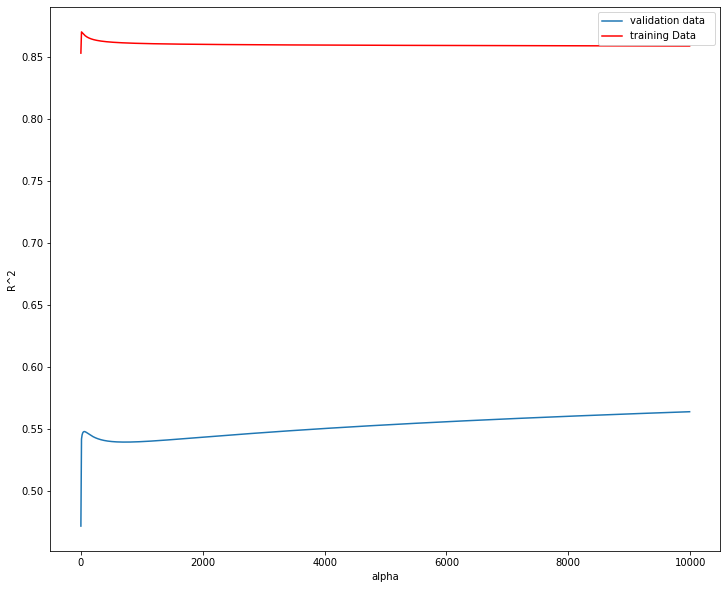

In [76]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Here the model is built and tested on the same data. So the training and test data are the same.

The red line in figure 6 represents the R^2 of the training data.
As Alpha increases the R^2 decreases.
Therefore as Alpha increases the model performs worse on the training data.

The blue line represents the R^2 on the validation data.
As the value for Alpha increases the R^2 increases and converges at a point

# **Grid Search**

Grid search allows us to scan through multiple parameters with few lines of code

Scikit learn provides us the ability to iterate over these hyperparameters such as alpha using a cross-validation technique called grid search.

It takes the model or object that we would like to train along with different hyperparameter values and then calculates the MSE(mean squared error) or R-Squared for various hyperparameter values allowing you to choose the best hyperparameter value/s.

In order to choose what alpha value will best suit our model, we will make an array of possible alpha values say alpha_list=[0.1,0.01,10], we will use training and validation data sets, we will train the data set using the training data then make a prediction using the validation data using r-square(can also use mean square error MSE) for each of the alpha values. Which even alpha value has the largest r-square value will be selected.

Grid search performs the above process.

Apply Ridge Regression to linear regression models: Ridge regression is a regression that is employed in a Multiple regression model when Multicollinearity occurs.


Tune hyper-parameters of an estimator using Grid search: Grid search is a time-efficient tuning technique that exhaustively computes the optimum values of hyperparameters performed on specific parameter values of estimators.


In [78]:
# heres how to perform grid search

from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}] # we can also use normalize parameter to normalize data then fit it

RR=Ridge()

Grid1=GridSearchCV(RR,parameters1,cv=4) # 4 is the number of folds
Grid1.fit(x_data[['horsepower','curb-weight', 'engine-size', 'highway-mpg']],y_data)
BestRR=Grid1.best_estimator_

print(BestRR)

##scores=Grid1.cv_results_
#scores['mean_test_score']

# we now test our model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

yhat=BestRR.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) #to know the predicted values

yhat

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


array([ 5424.08752986, 10059.02156054, 19033.79411975, 22362.36261826,
       21332.24630424,  9558.07959027, 13949.8576991 ,  5711.45399612,
       17926.58344271,  7030.15515201, 11233.50805631, 24611.92068541,
        7031.90728369,  8212.92826644, 19260.22743035, 16182.29203358,
        6228.8407519 , 13826.99113397,  9747.46562788,  5797.24976195,
        8073.54240389, 12574.67449513, 34229.07403288,  7451.92675027,
       10394.25507373, 24392.17323414,  9228.45841337,  9670.71812147,
       18085.13480965, 34229.07403288, 28007.49306103, 10884.4500226 ,
        7193.3489976 , 19308.47843384,  8804.69476435, 11126.93734198,
       13767.0600109 , 15762.37173304, 11331.2683208 , 15697.0476046 ,
        6744.05115386, 23096.78595966,  9119.33316049, 18192.07793888,
       17372.80649091, 12966.90113101, 17914.52259553,  6096.90537732,
        5870.06588406, 10808.06264403, 36347.94487451, 24392.17323414,
       10412.29107156, 11121.45176782,  7172.94523549,  5870.06588406,
      